In [1]:
import numpy as np
import pandas as pd
import re
import requests
from collections import Counter
#import dog functions as df

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
url = "https://raw.github.com/katyakraft/project_1/main/NYC_Dog_Licensing_Dataset_20240923.csv"

In [4]:

df = pd.read_csv(url)

/var/folders/7c/x67b6nwd1kbd8z85vpp7nrw80000gn/T/ipykernel_38184/4252988408.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [5]:
df.columns = [col.replace(" ","_").lower() for col in df.columns]
df.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,licenseissueddate,licenseexpireddate,extract_year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035.0,09/12/2014,09/12/2017,2016
1,YOGI,M,2010,Boxer,10465.0,09/12/2014,10/02/2017,2016
2,ALI,M,2014,Basenji,10013.0,09/12/2014,09/12/2019,2016
3,QUEEN,F,2013,Akita Crossbreed,10013.0,09/12/2014,09/12/2017,2016
4,LOLA,F,2009,Maltese,10028.0,09/12/2014,10/09/2017,2016


In [6]:
df["breedname"].unique()

array(['American Pit Bull Mix / Pit Bull Mix', 'Boxer', 'Basenji', ...,
       'Hound Crossbreed', 'Airedale Terrier Crossbreed',
       'Pyrenean Mastiff'], dtype=object)

In [7]:
df.isna().any()

animalname             True
animalgender           True
animalbirthyear       False
breedname             False
zipcode                True
licenseissueddate     False
licenseexpireddate     True
extract_year          False
dtype: bool

In [8]:
df.dtypes

animalname             object
animalgender           object
animalbirthyear        object
breedname              object
zipcode               float64
licenseissueddate      object
licenseexpireddate     object
extract_year            int64
dtype: object

In [9]:
df["breedname"].value_counts()

breedname
Unknown                                               55254
Yorkshire Terrier                                     35363
Shih Tzu                                              32432
Chihuahua                                             24634
Labrador Retriever                                    18902
Maltese                                               18377
Labrador Retriever Crossbreed                         16532
American Pit Bull Mix / Pit Bull Mix                  15073
Pomeranian                                            11953
Shih Tzu Crossbreed                                   11784
American Pit Bull Terrier/Pit Bull                    11596
Poodle Crossbreed                                     10696
Havanese                                              10658
Chihuahua Crossbreed                                   9633
Golden Retriever                                       9253
Beagle                                                 8998
French Bulldog                

In [10]:
df[["breedname", "animalbirthyear"]].value_counts()

breedname                                           animalbirthyear
Unknown                                             2010               4607
                                                    2009               4240
                                                    2011               4119
                                                    2012               3884
                                                    2008               3766
                                                    2007               3197
                                                    2006               3041
                                                    2013               2956
                                                    2005               2570
                                                    2014               2389
Yorkshire Terrier                                   2016               2229
                                                    2017               2086
                    

In [11]:
df["extract_year"].unique()

array([2016, 2018, 2017, 2022, 2023])

In [12]:
df["animalbirthyear"].unique()

array([2014, 2010, 2013, 2009, 2006, 2008, 2012, 2007, 2005, 2011, 2001,
       2004, 2003, 2000, 2002, 1991, 1992, 1993, 2015, 2016, 1994, 1995,
       1996, 1997, 2017, 1998, 1999, 2018, 2019, 2020, 2021, '2021',
       '2019', '2016', '2013', '2017', '2015', '2011', '2014', '2007',
       '2020', '2018', '2012', '2010', '2008', '2001', '2009', '2005',
       '2006', '2004', '2002', '2003', '2000', 'ERROR: #VALUE!', '1999',
       '1996', '1973', '1930', '1990', '1995', '1997', '2022', '1992',
       '1986', '1921', '1922', '1912', '1998', '2023', '1993', '1991',
       '1987', '1934', '1989', '1920', '1923'], dtype=object)

In [13]:
pd.set_option('display.max_rows', None)

In [14]:
df["breedname"].value_counts()

breedname
Unknown                                               55254
Yorkshire Terrier                                     35363
Shih Tzu                                              32432
Chihuahua                                             24634
Labrador Retriever                                    18902
Maltese                                               18377
Labrador Retriever Crossbreed                         16532
American Pit Bull Mix / Pit Bull Mix                  15073
Pomeranian                                            11953
Shih Tzu Crossbreed                                   11784
American Pit Bull Terrier/Pit Bull                    11596
Poodle Crossbreed                                     10696
Havanese                                              10658
Chihuahua Crossbreed                                   9633
Golden Retriever                                       9253
Beagle                                                 8998
French Bulldog                

In [15]:
#df["animalname"].value_counts()

In [16]:
names_to_drop = ["UNKNOWN", "NAME NOT PROVIDED"]

df_cleaned = df[~df['animalname'].isin(names_to_drop)]

print(f"Number of rows after dropping 'UNKNOWN' and 'NAME NOT PROVIDED': {len(df_cleaned)}")

rows_removed = len(df) - len(df_cleaned)
print(f"Total rows removed: {rows_removed}")

Number of rows after dropping 'UNKNOWN' and 'NAME NOT PROVIDED': 594604
Total rows removed: 22286


In [17]:
#df_cleaned["animalname"].value_counts()

In [18]:
df_lowercase = df_cleaned.map(lambda s: s.lower() if type(s) == str else s)

In [19]:
df_lowercase.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,licenseissueddate,licenseexpireddate,extract_year
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,09/12/2014,09/12/2017,2016
1,yogi,m,2010,boxer,10465.0,09/12/2014,10/02/2017,2016
2,ali,m,2014,basenji,10013.0,09/12/2014,09/12/2019,2016
3,queen,f,2013,akita crossbreed,10013.0,09/12/2014,09/12/2017,2016
4,lola,f,2009,maltese,10028.0,09/12/2014,10/09/2017,2016


In [20]:
#df_duplicated = df_lowercase.duplicated().sum()
#df_duplicated

In [21]:
df_no_duplicates = df_lowercase.drop_duplicates()
df_no_duplicates.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,licenseissueddate,licenseexpireddate,extract_year
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,09/12/2014,09/12/2017,2016
1,yogi,m,2010,boxer,10465.0,09/12/2014,10/02/2017,2016
2,ali,m,2014,basenji,10013.0,09/12/2014,09/12/2019,2016
3,queen,f,2013,akita crossbreed,10013.0,09/12/2014,09/12/2017,2016
4,lola,f,2009,maltese,10028.0,09/12/2014,10/09/2017,2016


In [22]:
df_no_duplicates.duplicated().sum()

0

In [23]:
df_no_duplicates.shape

(558251, 8)

In [24]:
df_no_duplicates['namelength'] = df_no_duplicates['animalname'].apply(lambda name: len(name)if pd.notnull(name) else 0)

/var/folders/7c/x67b6nwd1kbd8z85vpp7nrw80000gn/T/ipykernel_38184/1691885961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['namelength'] = df_no_duplicates['animalname'].apply(lambda name: len(name)if pd.notnull(name) else 0)


In [25]:
df_no_duplicates.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,licenseissueddate,licenseexpireddate,extract_year,namelength
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,09/12/2014,09/12/2017,2016,5
1,yogi,m,2010,boxer,10465.0,09/12/2014,10/02/2017,2016,4
2,ali,m,2014,basenji,10013.0,09/12/2014,09/12/2019,2016,3
3,queen,f,2013,akita crossbreed,10013.0,09/12/2014,09/12/2017,2016,5
4,lola,f,2009,maltese,10028.0,09/12/2014,10/09/2017,2016,4


In [26]:
new_df = df_no_duplicates.drop(["licenseexpireddate","licenseissueddate", "extract_year"], axis=1)
new_df.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,namelength
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,5
1,yogi,m,2010,boxer,10465.0,4
2,ali,m,2014,basenji,10013.0,3
3,queen,f,2013,akita crossbreed,10013.0,5
4,lola,f,2009,maltese,10028.0,4


In [27]:
#new_df["breedname"].value_counts()

In [28]:
new_df['breedname'] = new_df['breedname'].str.strip().str.lower()

In [29]:
new_df.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,namelength
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,5
1,yogi,m,2010,boxer,10465.0,4
2,ali,m,2014,basenji,10013.0,3
3,queen,f,2013,akita crossbreed,10013.0,5
4,lola,f,2009,maltese,10028.0,4


In [30]:
new_df['breedname'] = new_df['breedname'].replace("/", " ")
new_df.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,namelength
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,5
1,yogi,m,2010,boxer,10465.0,4
2,ali,m,2014,basenji,10013.0,3
3,queen,f,2013,akita crossbreed,10013.0,5
4,lola,f,2009,maltese,10028.0,4


In [31]:
new_df['breedname'] = new_df['breedname'].replace("/", " ", regex=False)
new_df.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,namelength
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,5
1,yogi,m,2010,boxer,10465.0,4
2,ali,m,2014,basenji,10013.0,3
3,queen,f,2013,akita crossbreed,10013.0,5
4,lola,f,2009,maltese,10028.0,4


In [32]:
new_df["breedname"] = new_df["breedname"].str.replace(r'\s+x$', '', regex=True)
new_df.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,namelength
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,5
1,yogi,m,2010,boxer,10465.0,4
2,ali,m,2014,basenji,10013.0,3
3,queen,f,2013,akita crossbreed,10013.0,5
4,lola,f,2009,maltese,10028.0,4


In [33]:
def breed_groups(breedname):
    
    if re.search(r'pit bull|pitbull', breedname):  
        return 'pitbull'
    elif re.search(r'chihuahua', breedname): 
        return 'chihuahua'
    elif re.search(r'poodle', breedname):  
        return 'poodle'
    elif re.search(r'crossbread|crossbreed| mixed| cross breed|mix|cross bread' , breedname):  
        return 'crossbreed'
    elif re.search(r'dachshund|dachs hund' , breedname):  
        return 'dachshund'
    elif re.search(r'labrador' , breedname):  
        return 'labrador'
    elif re.search(r'beagle|beagel' , breedname):  
        return 'beagle'
    elif re.search(r'german shepherd' , breedname):  
        return 'german shepherd'
    elif re.search(r'golden' , breedname):  
        return 'golden retriever'
    elif re.search(r'shih tzu|shihtzu' , breedname):  
        return 'shih tzu'
    elif re.search(r'maltese' , breedname):  
        return 'maltese' 
    elif re.search(r'husky|siberianhusky' , breedname):  
        return 'siberian husky' 
    elif re.search(r'cocker spaniel' , breedname):  
        return 'cocker spaniel' 
    elif re.search(r'boxer' , breedname):  
        return 'boxer' 
    elif re.search(r'rotweiler' , breedname):  
        return 'rotweiler' 
    elif re.search(r'dalmatian' , breedname):  
        return 'dalmatian'
    elif re.search(r'yorkshire terrier' , breedname):  
        return 'yorkshire terrier'
    elif re.search(r'pomeranian' , breedname):  
        return 'pomeranian'
    elif re.search(r'havanese' , breedname):  
        return 'havanese'
    elif re.search(r'french bulldog' , breedname):  
        return 'french bulldog'
    elif re.search(r'jack russell terrier' , breedname):  
        return 'jack russell terrier'
    elif re.search(r'cavalier king charles spaniel' , breedname):  
        return 'cavalier king charles spaniel'
    elif re.search(r'shiba inu|shibainu' , breedname):  
        return 'shiba inu'
    elif re.search(r'not provided|unknown' , breedname):  
        return 'unknown'    
    elif re.search(r'pug|pugg' , breedname):  
        return 'pug'
    elif re.search(r'australian shepherd' , breedname):  
        return 'australian shepherd'
    elif re.search(r'boston terrier|bostonterrier|boston' , breedname):  
        return 'boston terrier'
    elif re.search(r'labradoodle' , breedname):  
        return 'labradoodle'
    elif re.search(r'bichon frise|bichon' , breedname):  
        return 'bichon frise'
    elif re.search(r'morkiamerican staffordshire terrier|morkie' , breedname):  
        return 'morkie'
    elif re.search(r'maltipoo' , breedname):  
        return 'maltipoo'
    elif re.search(r'miniature schnauzer|schnauzer, miniature|schnauzer miniature' , breedname):  
        return 'miniature schnauzer'
    elif re.search(r'miniature pinscher' , breedname):  
        return 'miniature pinscher'
    elif re.search(r'puggle' , breedname):  
        return 'puggle' 
    elif re.search(r'lhasa apso' , breedname):  
        return 'lhasa apso'
    elif re.search(r'pekingese' , breedname):  
        return 'pekingese'
    elif re.search(r'cockapoo ' , breedname):  
        return 'cockapoo '
    elif re.search(r'cairn terrier|cairn' , breedname):  
        return 'cairn terrier'
    elif re.search(r'border collie' , breedname):  
        return 'border collie'
    elif re.search(r'corgi' , breedname):  
        return 'pembroke welsh corgi'
    elif re.search(r'australian cattledog' , breedname):  
        return 'australian cattledog'
    elif re.search(r'jindo dog|jindo' , breedname):  
        return 'jindo dog'
    elif re.search(r'papillon' , breedname):  
        return 'papillon'
    elif re.search(r'wheaton terrier' , breedname):  
        return 'wheaton terrier'
    elif re.search(r'bernese' , breedname):  
        return 'bernese'
    elif re.search(r'chow chow|chowchow' , breedname):  
        return 'chow chow'
    else:
        pass



new_df['breedgroup'] = new_df['breedname'].apply(breed_groups)
new_df['breedgroup'].value_counts()
new_df.head()




,animalname,animalgender,animalbirthyear,breedname,zipcode,namelength,breedgroup
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,5,pitbull
1,yogi,m,2010,boxer,10465.0,4,boxer
2,ali,m,2014,basenji,10013.0,3,None
3,queen,f,2013,akita crossbreed,10013.0,5,crossbreed
4,lola,f,2009,maltese,10028.0,4,maltese


In [34]:
# API DATA

In [35]:
def get_breed_data():
    # Initialize an empty list to store breed data
    breed_list = []

    # Fetch the list of breeds from the API
    url = "https://api.thedogapi.com/v1/breeds"
    headers = {"x-api-key": "live_bbCrlls8Jw8I19PRwoKOY8c78YaFNHN60TaHSumPkzBWitHe3R3QTqIVteDxLAWs"}
    
    # Make the request to get all breeds
    response = requests.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        breeds = response.json()  # Get the list of all breeds

        # Loop through the breeds and extract relevant data
        for breed in breeds:
            breed_data = {
                "Breed Name": breed.get("name").lower(),
                "Life Span": breed.get("life_span"),
                "Temperament": breed.get("temperament"),
                "Breed Group": breed.get("breed_group"),
                "Weight": breed.get("weight", {}).get("metric"),
                "Height": breed.get("height", {}).get("metric"),
                "Bred For": breed.get('bred_for'),
                "Origin": breed.get("origin")
            }
            breed_list.append(breed_data)

        # Convert the list of dictionaries into a DataFrame
        df_breeds = pd.DataFrame(breed_list)
        df_breeds.columns = [col.replace(" ","_").lower() for col in df_breeds.columns]



        df_breeds.columns = [col.replace("_","").lower() for col in df_breeds.columns]
        return df_breeds


# Call the function to get breed list
df_breeds = get_breed_data()

df_breeds




,breedname,lifespan,temperament,breedgroup,weight,height,bredfor,origin
0,affenpinscher,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...",Toy,3 - 6,23 - 29,"Small rodent hunting, lapdog","Germany, France"
1,afghan hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy",Hound,23 - 27,64 - 69,Coursing and hunting,"Afghanistan, Iran, Pakistan"
2,african hunting dog,11 years,"Wild, Hardworking, Dutiful",None,20 - 30,76,A wild pack animal,
3,airedale terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...",Terrier,18 - 29,53 - 58,"Badger, otter hunting","United Kingdom, England"
4,akbash dog,10 - 12 years,"Loyal, Independent, Intelligent, Brave",Working,41 - 54,71 - 86,Sheep guarding,
5,akita,10 - 14 years,"Docile, Alert, Responsive, Dignified, Composed...",Working,29 - 52,61 - 71,Hunting bears,None
6,alapaha blue blood bulldog,12 - 13 years,"Loving, Protective, Trainable, Dutiful, Respon...",Mixed,25 - 41,46 - 61,Guarding,None
7,alaskan husky,10 - 13 years,"Friendly, Energetic, Loyal, Gentle, Confident",Mixed,17 - 23,58 - 66,Sled pulling,None
8,alaskan malamute,12 - 15 years,"Friendly, Affectionate, Devoted, Loyal, Dignif...",Working,29 - 45,58 - 64,"Hauling heavy freight, Sled pulling",None
9,american bulldog,10 - 12 years,"Friendly, Assertive, Energetic, Loyal, Gentle,...",Working,27 - 54,56 - 69,None,None


In [36]:
import pandas as pd
from collections import Counter

def count_characteristics(df_breeds):
    """ This function picks the 5 most popular characteristics of dog breeds """    
    # Combine all characteristics into a single list
    all_characteristics = []
    for characteristics in df_breeds["temperament"]:  
        if isinstance(characteristics, str):
            all_characteristics.extend(characteristics.split(', '))
    
    # Count characteristics
    characteristic_counts = Counter(all_characteristics)
    
    # Convert to DataFrame and shorten
    result_characteristics = pd.DataFrame.from_dict(characteristic_counts, orient='index', columns=['Count'])
    result_characteristics = result_characteristics.sort_values('Count', ascending=False)
    result_characteristics = result_characteristics.head(5)
    

    return result_characteristics

def add_columns(df_breeds, result_characteristics):
    """ This function adds new columns with boolean values of the 5 most popular characteristics """    

    for characteristic in result_characteristics.index:  
        df_breeds[characteristic] = df_breeds['temperament'].str.contains(characteristic, case=False)

    return df_breeds




# Count characteristics and add columns
result_characteristics = count_characteristics(df_breeds)

count_characteristics(df_breeds)

add_columns(df_breeds,result_characteristics)

df_breeds.columns = [col.replace(" ","_").lower() for col in df_breeds.columns]



df_breeds.columns = [col.replace("_","").lower() for col in df_breeds.columns]
df_breeds.head()

def breed_groups(breedname):
    
    if re.search(r'pit bull|pitbull', breedname):  
        return 'pitbull'
    elif re.search(r'chihuahua', breedname): 
        return 'chihuahua'
    elif re.search(r'poodle', breedname):  
        return 'poodle'
    elif re.search(r'crossbread|crossbreed| mixed| cross breed|mix|cross bread' , breedname):  
        return 'crossbreed'
    elif re.search(r'dachshund|dachs hund' , breedname):  
        return 'dachshund'
    elif re.search(r'labrador' , breedname):  
        return 'labrador'
    elif re.search(r'beagle|beagel' , breedname):  
        return 'beagle'
    elif re.search(r'german shepherd' , breedname):  
        return 'german shepherd'
    elif re.search(r'golden' , breedname):  
        return 'golden retriever'
    elif re.search(r'shih tzu|shihtzu' , breedname):  
        return 'shih tzu'
    elif re.search(r'maltese' , breedname):  
        return 'maltese' 
    elif re.search(r'husky|siberianhusky|siberian husky' , breedname):  
        return 'siberian husky' 
    elif re.search(r'cocker spaniel' , breedname):  
        return 'cocker spaniel' 
    elif re.search(r'boxer' , breedname):  
        return 'boxer' 
    elif re.search(r'rotweiler' , breedname):  
        return 'rotweiler' 
    elif re.search(r'dalmatian' , breedname):  
        return 'dalmatian'
    elif re.search(r'yorkshire terrier' , breedname):  
        return 'yorkshire terrier'
    elif re.search(r'pomeranian' , breedname):  
        return 'pomeranian'
    elif re.search(r'havanese' , breedname):  
        return 'havanese'
    elif re.search(r'french bulldog' , breedname):  
        return 'french bulldog'
    elif re.search(r'jack russell terrier' , breedname):  
        return 'jack russell terrier'
    elif re.search(r'cavalier king charles spaniel' , breedname):  
        return 'cavalier king charles spaniel'
    elif re.search(r'shiba inu|shibainu' , breedname):  
        return 'shiba inu'
    elif re.search(r'not provided|unknown' , breedname):  
        return 'unknown'    
    elif re.search(r'pug|pugg' , breedname):  
        return 'pug'
    elif re.search(r'australian shepherd' , breedname):  
        return 'australian shepherd'
    elif re.search(r'boston terrier|bostonterrier|boston' , breedname):  
        return 'boston terrier'
    elif re.search(r'labradoodle' , breedname):  
        return 'labradoodle'
    elif re.search(r'bichon frise|bichon' , breedname):  
        return 'bichon frise'
    elif re.search(r'morkiamerican staffordshire terrier|morkie' , breedname):  
        return 'morkie'
    elif re.search(r'maltipoo' , breedname):  
        return 'maltipoo'
    elif re.search(r'miniature schnauzer|schnauzer, miniature|schnauzer miniature' , breedname):  
        return 'miniature schnauzer'
    elif re.search(r'miniature pinscher' , breedname):  
        return 'miniature pinscher'
    elif re.search(r'puggle' , breedname):  
        return 'puggle' 
    elif re.search(r'lhasa apso' , breedname):  
        return 'lhasa apso'
    elif re.search(r'pekingese' , breedname):  
        return 'pekingese'
    elif re.search(r'cockapoo ' , breedname):  
        return 'cockapoo '
    elif re.search(r'cairn terrier|cairn' , breedname):  
        return 'cairn terrier'
    elif re.search(r'border collie' , breedname):  
        return 'border collie'
    elif re.search(r'corgi' , breedname):  
        return 'pembroke welsh corgi'
    elif re.search(r'australian cattledog' , breedname):  
        return 'australian cattledog'
    elif re.search(r'jindo dog|jindo' , breedname):  
        return 'jindo dog'
    elif re.search(r'papillon' , breedname):  
        return 'papillon'
    elif re.search(r'wheaton terrier' , breedname):  
        return 'wheaton terrier'
    elif re.search(r'bernese' , breedname):  
        return 'bernese'
    elif re.search(r'chow chow|chowchow' , breedname):  
        return 'chow chow'
    else:
       pass 


df_breeds['breedgroup'] = df_breeds['breedname'].apply(breed_groups)



# Replace 'None' in the 'breedgroup' column with values from the 'breedname' column
df_breeds.loc[df_breeds['breedgroup'].isna(), 'breedgroup'] = df_breeds['breedname']




#drop duplicates of breedgroup names
df_breeds = df_breeds.drop_duplicates(subset=["breedgroup"])
#df_breeds['breedgroup'].value_counts()

df_breeds.shape

(168, 13)

In [37]:
merged_df = pd.merge(new_df, df_breeds, on='breedgroup', how='left')


merged_df.loc[merged_df['breedgroup'].isna(), 'breedgroup'] = merged_df['breedname_x']
merged_df['breedgroup'].isnull().sum()

merged_df.drop(columns=["breedname_y"], inplace=True, errors='raise')

merged_df = merged_df.rename(columns={'animalname': 'animal_name', 
                                      'animalgender': 'animal_gender', 
                                      'animalbirthyear': 'animal_birthyear', 
                                      'breedname_x': 'breed_name', 
                                      'namelength': 'name_length',
                                      'breedgroup': 'breed_group',
                                      'bredfor': 'bred_for'
                                     })

# Adding data for Chihuahua and Dachshund
dog_data = {
    'chihuahua': {
        'breed_group': 'chihuahua',
        'lifespan': '12-20 years',
        'temperament': 'Devoted, Lively, Alert',
        'weight': '1-6 pounds (0.5-2.7 kg)',
        'height': '5-8 inches (13-20 cm)',
        'bred_for': 'Companionship',
        'origin': 'Mexico',
        'intelligent': True,
        'affectionate': True,
        'alert': True,
        'friendly': True,
        'loyal': True
    },
    'dachshund': {
        'breed_group': 'dachshund',
        'lifespan': '12-16 years',
        'temperament': 'Clever, Stubborn, Devoted',
        'weight': '16-32 pounds (7-14.5 kg)',
        'height': '8-9 inches (20-23 cm)',
        'bred_for': 'Scent hound, hunting badgers',
        'origin': 'Germany',
        'intelligent': True,
        'affectionate': True,
        'alert': True,
        'friendly': False,
        'loyal': True
    }
}

# Update the DataFrame
for breed, data in dog_data.items():
    # Check if the breed exists in the DataFrame
    if breed in merged_df['breed_group'].values:
        
        for column, value in data.items():
            merged_df.loc[merged_df['breed_group'] == breed, column] = value



In [76]:
merged_df.head()

,animal_name,animal_gender,animal_birthyear,breed_name,zipcode,name_length,breed_group,lifespan,temperament,weight,height,bred_for,origin,intelligent,affectionate,alert,friendly,loyal
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,5,pitbull,10 - 15 years,"Strong Willed, Stubborn, Friendly, Clownish, A...",14 - 27,43 - 53,Fighting,None,True,True,False,True,True
1,yogi,m,2010,boxer,10465.0,4,boxer,8 - 10 years,"Devoted, Fearless, Friendly, Cheerful, Energet...",23 - 32,55 - 64,"Bull-baiting, guardian",None,True,False,False,True,True
2,ali,m,2014,basenji,10013.0,3,basenji,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,queen,f,2013,akita crossbreed,10013.0,5,crossbreed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,lola,f,2009,maltese,10028.0,4,maltese,15 - 18 years,"Playful, Docile, Fearless, Affectionate, Sweet...",2 - 3,20 - 25,Lapdog,None,True,True,False,False,False


In [489]:
#top 10 dog names
top_names = merged_df['animal_name'].value_counts().head(20)
#top_names
#top_names = ["buddy", "lucky", "milo", "bailey", "toby"]
#top_names = ["bella", "max", "charlie", "luna", "coco"]

In [469]:
#remove invalid birth years 
merged_df['animal_birthyear'] = pd.to_numeric(merged_df['animal_birthyear'], errors='coerce')


In [471]:
#create a copy with valid birth years
only_with_birthyear_df = merged_df.dropna(subset=['animal_birthyear'])

In [473]:
# Calculate the total number of dogs registered per year
total_dogs_per_year = merged_df.groupby('animal_birthyear')['animal_name'].count()


       animal_name animal_gender  animal_birthyear  \
456147    marigold             f               NaN   
457082         dog             m               NaN   
457162        lola             f               NaN   
460224        seul             f               NaN   
465281       osito             m               NaN   
466162       cream             m               NaN   
467484      diesel             m               NaN   
478077           a             m               NaN   
478943      trevor             m               NaN   
479188      canelo             m               NaN   
482026         teo             m               NaN   
486740      prince             m               NaN   
486831    unknowed             m               NaN   
492983    cashmere             m               NaN   
494545         bam             m               NaN   
497182      maggie             f               NaN   
507329       oscar             m               NaN   
507960     nutella          

In [475]:
# Ensure the animal_birthyear column is in numeric format
only_with_birthyear_df['animal_birthyear'] = pd.to_numeric(only_with_birthyear_df['animal_birthyear'].astype(int), errors='coerce')

In [477]:
# group by year and stack to use name as index
result = only_with_birthyear_df[only_with_birthyear_df['animal_name'].isin(top_names)].groupby(['animal_name', 'animal_birthyear'])['animal_name'].count().unstack(fill_value=0)

result

animal_birthyear,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
animal_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bailey,0,0,2,4,10,8,11,33,51,92,96,84,180,168,177,139,110,178,173,236,224,244,176,136,174,73,42,17
buddy,0,1,1,10,8,20,39,55,99,108,155,102,194,157,204,178,185,250,211,219,230,136,165,102,115,64,36,16
lucky,1,0,2,6,12,16,41,28,75,106,131,208,145,227,255,233,167,147,245,196,216,151,129,109,98,56,40,8
milo,0,0,0,0,3,1,13,17,13,25,52,70,63,76,120,124,144,170,174,201,268,234,198,274,344,217,139,45
toby,0,1,0,1,4,6,10,30,34,42,71,108,106,119,110,142,171,213,205,251,188,159,175,116,117,79,31,14


In [479]:

# Filter the DataFrame for years from 2000
filtered_df = only_with_birthyear_df[only_with_birthyear_df['animal_birthyear'] >= 2000]

# Calculate total dogs registered per year for the filtered DataFrame
total_dogs_per_year = filtered_df.groupby('animal_birthyear')['animal_name'].count()


total_dogs_per_year.head(50)

animal_birthyear
2000     1732
2001     2357
2002     3700
2003     6157
2004     8718
2005    12307
2006    15926
2007    20288
2008    23973
2009    27594
2010    30275
2011    31139
2012    33531
2013    35893
2014    38041
2015    41042
2016    41436
2017    39461
2018    35707
2019    33221
2020    35073
2021    22150
2022    12165
2023     3985
Name: animal_name, dtype: int64

In [481]:
# Normalize the result DataFrame by the total number of dogs per year
# Ensure the indices match
normalized_result = (result / total_dogs_per_year) * 1000
normalized_result.head(50)

animal_birthyear,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
animal_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bailey,NaN,NaN,NaN,NaN,5.773672,3.394145,2.972973,5.359753,5.849966,7.475420,6.027879,4.140379,7.508447,6.088280,5.846408,4.463856,3.280546,4.959184,4.547725,5.750207,5.405927,6.183320,4.929006,4.093796,4.961081,3.295711,3.452528,4.265997
buddy,NaN,NaN,NaN,NaN,4.618938,8.485363,10.540541,8.932922,11.355816,8.775494,9.732513,5.027603,8.092437,5.689643,6.738233,5.716304,5.517283,6.965146,5.546647,5.335997,5.550729,3.446441,4.620943,3.070347,3.278875,2.889391,2.959309,4.015056
lucky,NaN,NaN,NaN,NaN,6.928406,6.788290,11.081081,4.547669,8.602891,8.612984,8.225543,10.252366,6.048471,8.226426,8.422791,7.482578,4.980466,4.095506,6.440420,4.775596,5.212858,3.826563,3.612737,3.281057,2.794172,2.528217,3.288122,2.007528
milo,NaN,NaN,NaN,NaN,1.732102,0.424268,3.513514,2.761085,1.491168,2.031364,3.265101,3.450315,2.627956,2.754222,3.963666,3.982145,4.294533,4.736300,4.574012,4.897422,6.467806,5.929905,5.545131,8.247795,9.808115,9.796840,11.426223,11.292346
toby,NaN,NaN,NaN,NaN,2.309469,2.545609,2.702703,4.872503,3.899977,3.412692,4.458119,5.323344,4.421641,4.312532,3.633361,4.560198,5.099758,5.934305,5.388922,6.115686,4.537117,4.029295,4.901000,3.491767,3.335899,3.566591,2.548294,3.513174


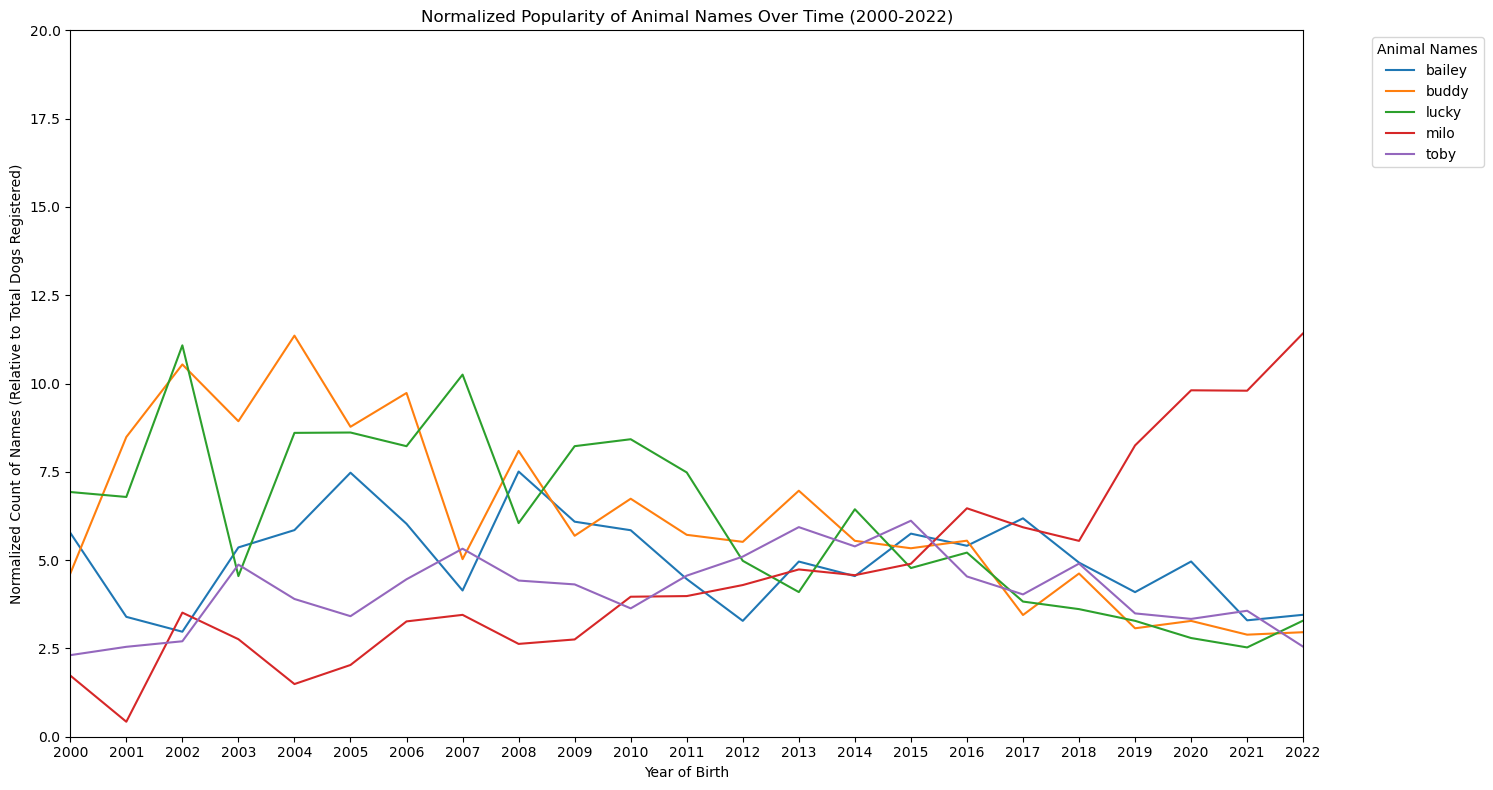

In [483]:
# Plot the normalized data
normalized_result.T.plot(figsize=(15, 8))
plt.title('Normalized Popularity of Animal Names Over Time (2000-2022)')
plt.xlabel('Year of Birth')
plt.ylabel('Normalized Count of Names (Relative to Total Dogs Registered)')
plt.xlim(2000, 2022)  # Keep the x-axis range the same
plt.ylim(0, 20)  # Set the y-axis limits

# Set x-ticks to be integer years only
plt.xticks(range(2000, 2023))  # Adjust the range according to your data

plt.legend(title='Animal Names', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [441]:


#charlie in 2005 - charlie and the chocolate factory movie came out

,animal_birthyear,animal_name,count,count_mean,count_std,z_score
2035,2001.0,max,35,2.310784,2.705441,12.082767
4135,2003.0,coco,63,3.544617,5.551642,10.709512
4773,2003.0,max,83,3.544617,5.551642,14.312050
5775,2004.0,buddy,99,4.378704,7.553975,12.526027
5852,2004.0,charlie,86,4.378704,7.553975,10.805079
5930,2004.0,coco,81,4.378704,7.553975,10.143175
6646,2004.0,max,80,4.378704,7.553975,10.010795
7043,2004.0,rocky,81,4.378704,7.553975,10.143175
7670,2005.0,bella,163,5.281974,10.597960,14.881923
7906,2005.0,charlie,163,5.281974,10.597960,14.881923
